# Naive Bayes classifier

Naive Bayes classifier where each pixel is distributed according to a Beta distribution of parameters α, β:
$d(x ; \alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha - 1} (1-x)^{\beta - 1}$

P.S. For a discussion about maximum likelihood for the parameters of a beta distribution you can look here. However, for this assignment the estimators obtained with he moments approach will be fine:

$$
\begin{aligned}
    & \alpha = KE[X] \\
    & \beta = K(1 - E[X]) \\
    & K = \frac{
        E[X](1 - E[X])
    }{
        Var[X]
    } - 1
\end{aligned}
$$

Note:
$α/(α+β)$ is the mean of the beta distribution.
if you compute the mean for each of the 784 models and reshape them into 28x28 images you can have a visual indication of what the model is learning.

# Setup
Let us import the required modules.

In [1]:
import pandas as pd
import seaborn as sns

from loguru import logger
from sklearn.metrics import accuracy_score

from src.classifiers.naivebayes import Beta_NB
import src.utilities.data_split as ds
import src.utilities.evaluation as eva
import src.utilities.model_selection as ms

## Load Data
Note that the dataset is already split into Train-Test sets.

In [2]:
data_split = ds.TrainTestSplit.from_csv_directory(dir_path="../data")

In [3]:
data_split.x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 719 entries, pixel13 to pixel780
dtypes: float64(719)
memory usage: 329.1 MB


In [4]:
data_split.y_train.shape

(60000,)

## Tuning Generative Classifiers: k-NN

Use a smaller dataset to reduce the workload of GridSearchCV

<AxesSubplot:ylabel='count'>

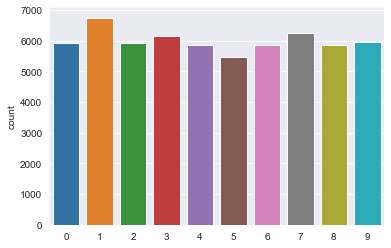

In [5]:
sns.countplot(x=data_split.y_train)

In [6]:
x_data_small, y_data_small = ds.get_train_subset(x_train=data_split.x_train, y_train=data_split.y_train, size=5000)

<AxesSubplot:xlabel='Number', ylabel='count'>

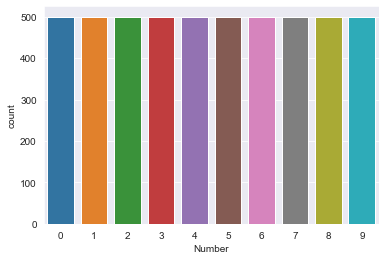

In [7]:
sns.countplot(x=y_data_small)

In [8]:
x_data_small.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 11288 to 45031
Data columns (total 719 columns):
 #    Column    Dtype  
---   ------    -----  
 0    pixel13   float64
 1    pixel14   float64
 2    pixel15   float64
 3    pixel16   float64
 4    pixel33   float64
 5    pixel34   float64
 6    pixel35   float64
 7    pixel36   float64
 8    pixel37   float64
 9    pixel38   float64
 10   pixel39   float64
 11   pixel40   float64
 12   pixel41   float64
 13   pixel42   float64
 14   pixel43   float64
 15   pixel44   float64
 16   pixel45   float64
 17   pixel46   float64
 18   pixel47   float64
 19   pixel48   float64
 20   pixel49   float64
 21   pixel50   float64
 22   pixel51   float64
 23   pixel52   float64
 24   pixel59   float64
 25   pixel60   float64
 26   pixel61   float64
 27   pixel62   float64
 28   pixel63   float64
 29   pixel64   float64
 30   pixel65   float64
 31   pixel66   float64
 32   pixel67   float64
 33   pixel68   float64
 34   pixel69   float64

In [9]:
y_data_small.shape

(5000,)

In [10]:
y_data_small

11288    0
10198    0
31469    0
44270    0
426      0
        ..
24457    9
12876    9
58249    9
45473    9
45031    9
Name: Number, Length: 5000, dtype: int64

## Tuning

No hyper-parameters to tune

## Model Training

In [11]:
# knn_clsf = KNN(n_neighbors=10, metric="manhattan")
# knn_clsf.fit(data_split.x_train, data_split.y_train)

b_nb=Beta_NB()

In [12]:
b_nb.fit(x_data_small, y_data_small)

/Users/a/GitHub/Discriminative-and-Generative-Classifiers/src/classifiers/naivebayes.py:195: RuntimeWarning: invalid value encountered in double_scalars
  k = ((logsumexp(ith_mean) * logsumexp((1 - logsumexp(ith_mean)))) / logsumexp(ith_var)) - 1  # K_i = (E[X_i] * (1 - E[X_i]) / Var[X_i]) - 1


Beta_NB()

# Performance

In [12]:
# knn_train_pred = b_nb.predict(data_split.x_train)  # too many samples, my laptop cannot handle it
b_nb_train_pred = b_nb.predict(x_data_small)
# b_nb_test_pred = b_nb.predict(data_split.x_test)

b_nb_train_eval = eva.Evaluation(y_true=y_data_small, y_pred=b_nb_train_pred)
# b_nb_test_eval = eva.Evaluation(y_true=data_split.y_test, y_pred=b_nb_test_pred)

2022-12-27 00:10:33.492 | DEBUG    | src.classifiers.naivebayes:predict:121 - Predicting sample #0


KeyError: (0, 0)

In [20]:
print("Training:")
b_nb_train_eval.acc_eval()
# print("Testing:")
# b_nb_test_eval.acc_eval()

Training:
-----Model Evaluations:-----
Accuracy score: 0.969
Testing:
-----Model Evaluations:-----
Accuracy score: 0.9666


In [23]:
# save the model and evaluations
b_nb_model = eva.EvaluatedModel(b_nb, "beta_naivebayes", train_eval=b_nb_train_eval, test_eval=b_nb_test_eval)
b_nb_model.save_evaluation()

In [24]:
# load the previously saved model and evaluations
b_nb_model = eva.EvaluatedModel.load_evaluation("beta_naivebayes)")

### Confusion Matrix

In [ ]:
b_nb_model.train_eval.conf_mat()

In [ ]:
b_nb_model.test_eval.conf_mat()